In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import DistanceMetric

Dane bez SMOTE

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Praca inżynierska/Parkinsson disease.csv'
df = pd.read_csv(file_path)
X = df.drop(['name','status'], axis=1)
y = df['status']

In [ ]:
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


Dane ze SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled,y_resampled = smote.fit_resample(X,y)
print("Rozmiar przed nadprobkowaniem",X.shape)
print("Rozmiar po nadpróbkowaniu",X_resampled.shape)

Rozmiar przed nadprobkowaniem (195, 22)
Rozmiar po nadpróbkowaniu (294, 22)


In [ ]:
X_resampled

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,0.043740,0.426000,...,0.029710,0.065450,0.022110,21.033000,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,0.061340,0.626000,...,0.043680,0.094030,0.019290,19.085000,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,0.052330,0.482000,...,0.035900,0.082700,0.013090,20.651000,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,0.054920,0.517000,...,0.037720,0.087710,0.013530,20.644000,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,0.064250,0.584000,...,0.044650,0.104700,0.017670,19.649000,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,243.119163,250.727397,232.063941,0.002145,0.000009,0.001121,0.001393,0.003363,0.014361,0.127956,...,0.010381,0.023698,0.004687,25.232508,0.431437,0.636257,-7.070877,0.091970,2.335149,0.091653
290,113.951292,117.202033,94.052415,0.003429,0.000030,0.001640,0.001977,0.004931,0.013920,0.125477,...,0.011332,0.020853,0.005407,26.053238,0.429030,0.736727,-6.157144,0.180320,1.869664,0.163543
291,191.203091,413.870166,76.678321,0.006966,0.000038,0.003466,0.003678,0.010389,0.022046,0.229625,...,0.015473,0.036195,0.066228,19.570680,0.458309,0.645784,-6.709208,0.199123,2.139844,0.124734
292,119.839649,198.941635,104.078872,0.005212,0.000048,0.002372,0.003070,0.007117,0.019634,0.178572,...,0.018018,0.028504,0.010125,22.886095,0.605519,0.687467,-5.591254,0.221884,2.145160,0.227271


In [ ]:
sc_resampled = StandardScaler()
sc_resampled.fit(X_resampled)
X_resampled = sc_resampled.transform(X_resampled) # Autoskalowanie
# PCA i transformacja X do głównych składowych (PC)
pca_resampled = PCA()
PC_resampled = pca_resampled.fit_transform(X_resampled)

In [ ]:
PC_resampled.shape

(294, 22)

In [ ]:
#PC.shape

(195, 22)

Analiza PCA

Opisywana zmienność zbalansowanych danych:  [6.00503546e-01 1.28225126e-01 6.36981465e-02 6.24773935e-02
 3.56019129e-02 2.91715652e-02 2.65832107e-02 1.68705727e-02
 1.08851858e-02 7.51740466e-03 5.94576722e-03 4.73134133e-03
 3.20986030e-03 1.64960063e-03 1.01136215e-03 7.45661501e-04
 5.54654385e-04 3.81866728e-04 1.91949672e-04 4.38527989e-05
 1.81017698e-08 1.76192398e-09]


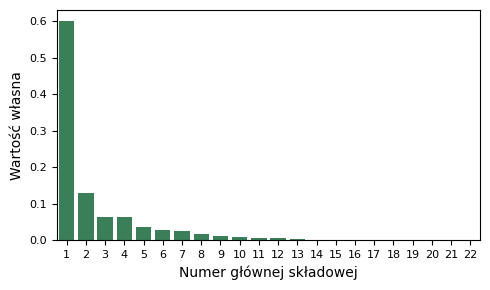

In [ ]:
# Analiza zmienności opisywanej przez poszczególne PC
#print('Opisywana zmienność niezbalansowanych danych: ', pca.explained_variance_ratio_)
print('Opisywana zmienność zbalansowanych danych: ', pca_resampled.explained_variance_ratio_)

plt.figure(figsize=(5, 3))


plt.xlabel('Numer głównej składowej')
plt.ylabel('Wartość własna')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.barplot(x=np.arange(1,23), y=pca_resampled.explained_variance_ratio_, color='seagreen')


plt.tight_layout()



plt.show()

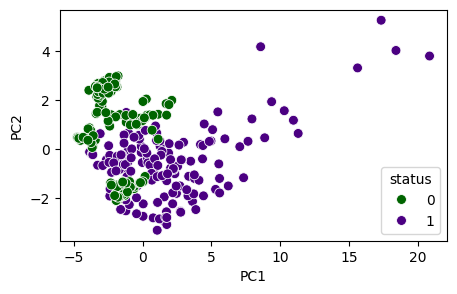

In [ ]:
# Rzut obiektów na płaszczyznę PC1/PC2

palette_2 = {0: '#006400', 1: '#4B0082'}
plt.figure(figsize=(5, 3))



sns.scatterplot(x=PC_resampled[:, 0], y=PC_resampled[:, 1], s=50, palette=palette_2, hue=y_resampled)
plt.xlabel('PC1')
plt.ylabel('PC2')

#plt.savefig('PC1/PC2.png') # zapisanie rysunku

plt.show()

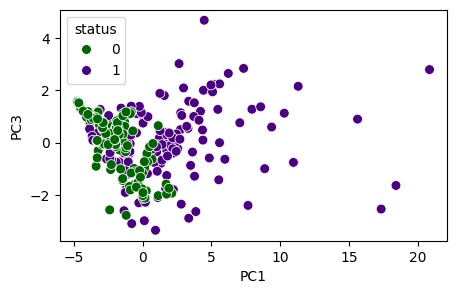

In [ ]:
# Rzut obiektów na płaszczyznę PC1/PC3

plt.figure(figsize=(5, 3))

sns.scatterplot(x=PC_resampled[:, 0], y=PC_resampled[:, 2], s=50, palette=palette_2, hue=y_resampled)
plt.xlabel('PC1')
plt.ylabel('PC3')


plt.show()

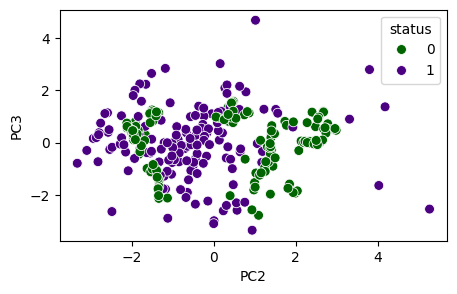

In [ ]:
# Rzut obiektów na płaszczyznę PC2/PC3

plt.figure(figsize=(5, 3))

sns.scatterplot(x=PC_resampled[:, 1], y=PC_resampled[:, 2], s=50, palette=palette_2, hue=y_resampled)
plt.xlabel('PC2')
plt.ylabel('PC3')


plt.show()

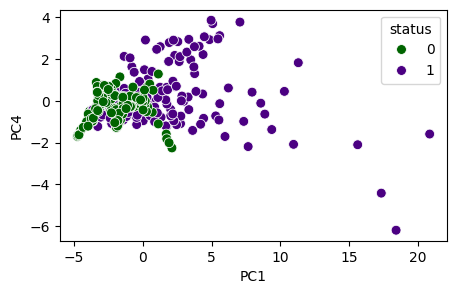

In [ ]:
# Rzut obiektów na płaszczyznę PC1/PC2

palette_2 = {0: '#006400', 1: '#4B0082'}
plt.figure(figsize=(5, 3))


sns.scatterplot(x=PC_resampled[:, 0], y=PC_resampled[:, 3], s=50, palette=palette_2, hue=y_resampled)
plt.xlabel('PC1')
plt.ylabel('PC4')


plt.show()

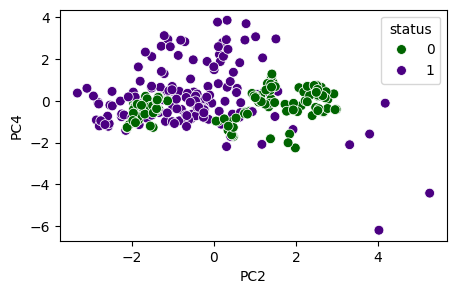

In [ ]:
# Rzut obiektów na płaszczyznę PC1/PC2

palette_2 = {0: '#006400', 1: '#4B0082'}
plt.figure(figsize=(5, 3))

sns.scatterplot(x=PC_resampled[:, 1], y=PC_resampled[:, 3], s=50, palette=palette_2, hue=y_resampled)
plt.xlabel('PC2')
plt.ylabel('PC4')


plt.show()

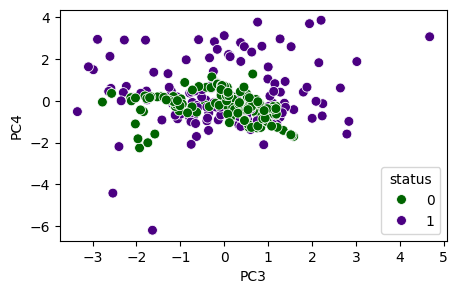

In [ ]:
# Rzut obiektów na płaszczyznę PC1/PC2

palette_2 = {0: '#006400', 1: '#4B0082'}
plt.figure(figsize=(5, 3))


sns.scatterplot(x=PC_resampled[:, 2], y=PC_resampled[:, 3], s=50, palette=palette_2, hue=y_resampled)
plt.xlabel('PC3')
plt.ylabel('PC4')


plt.show()